# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [32]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [33]:
tips = sns.load_dataset("tips")

In [34]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           5.02e-23
Time:                        07:45:11   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

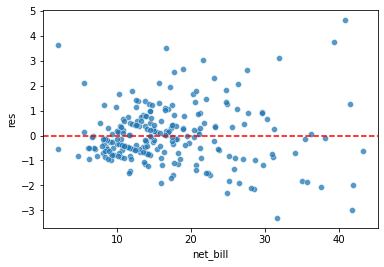

In [35]:
reg = smf.ols('tip ~ net_bill', tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [36]:
new_data = tips[10:15]
reg.predict(new_data)

10    2.180995
11    4.336535
12    2.706470
13    2.863417
14    2.503829
dtype: float64

<AxesSubplot:xlabel='net_bill', ylabel='tip'>

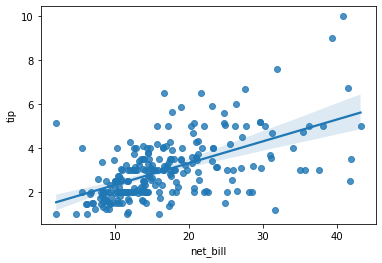

In [37]:
sns.regplot(data=tips, x='net_bill', y='tip')

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.52e-06
Time:                        07:45:11   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

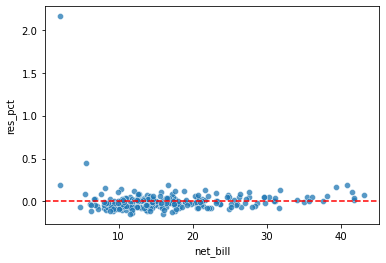

In [38]:
reg2 = smf.ols('tip_pct ~ net_bill', tips).fit()
print(reg2.summary())
tips['res_pct'] = reg2.resid

sns.scatterplot(x = 'net_bill', y = 'res_pct', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot:xlabel='net_bill', ylabel='tip_pct'>

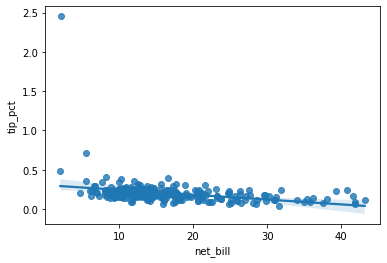

In [39]:
sns.regplot(data=tips, x='net_bill', y='tip_pct')

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

No primeiro gráfico temos uma dispersão ampla e com vários pontos longe da linha de regressão, porém no segundo os pontos se unem e temos um gráfico inviesado, ainda menos representativo e com o R² menor e AIC pior. Podemos comparar.


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [44]:
# Valor predito de Tip
tips['pred'] = reg.fittedvalues

predTip = tips[['pred', 'tip']].corr().iloc[0,1]
print(f'R² do Tip: {predTip}')

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

# Valor predito de Tip_pct
tips['pred_pct'] = reg2.fittedvalues

predTipPct = tips[['pred_pct', 'tip']].corr().iloc[0,1]
print(f'R² do Tip_pct: {predTipPct}')

R² do Tip: 0.5766634471096385
R² do Tip_pct: -0.5766634471096385


In [41]:
tips['pred_tip'] = tips['tip_pct']* tips['net_bill']

tips[['pred', 'pred_tip']]

,pred,pred_tip
0,2.918050,1.01
1,2.192915,1.66
2,3.070031,3.50
3,3.354125,3.31
4,3.414719,3.61
...,...,...
239,3.626300,5.92
240,3.831920,2.00
241,3.383925,2.00
242,2.926990,1.75
